# Regular Expression - Definition
A Regular Expression can be defined as a **pattern of text** that contains **characters like from a to z and from 0 to 9 and some special characters referred as metacharacters.** These two components are used together to match any text.

In [ ]:
import re # re module is imported

## re.search

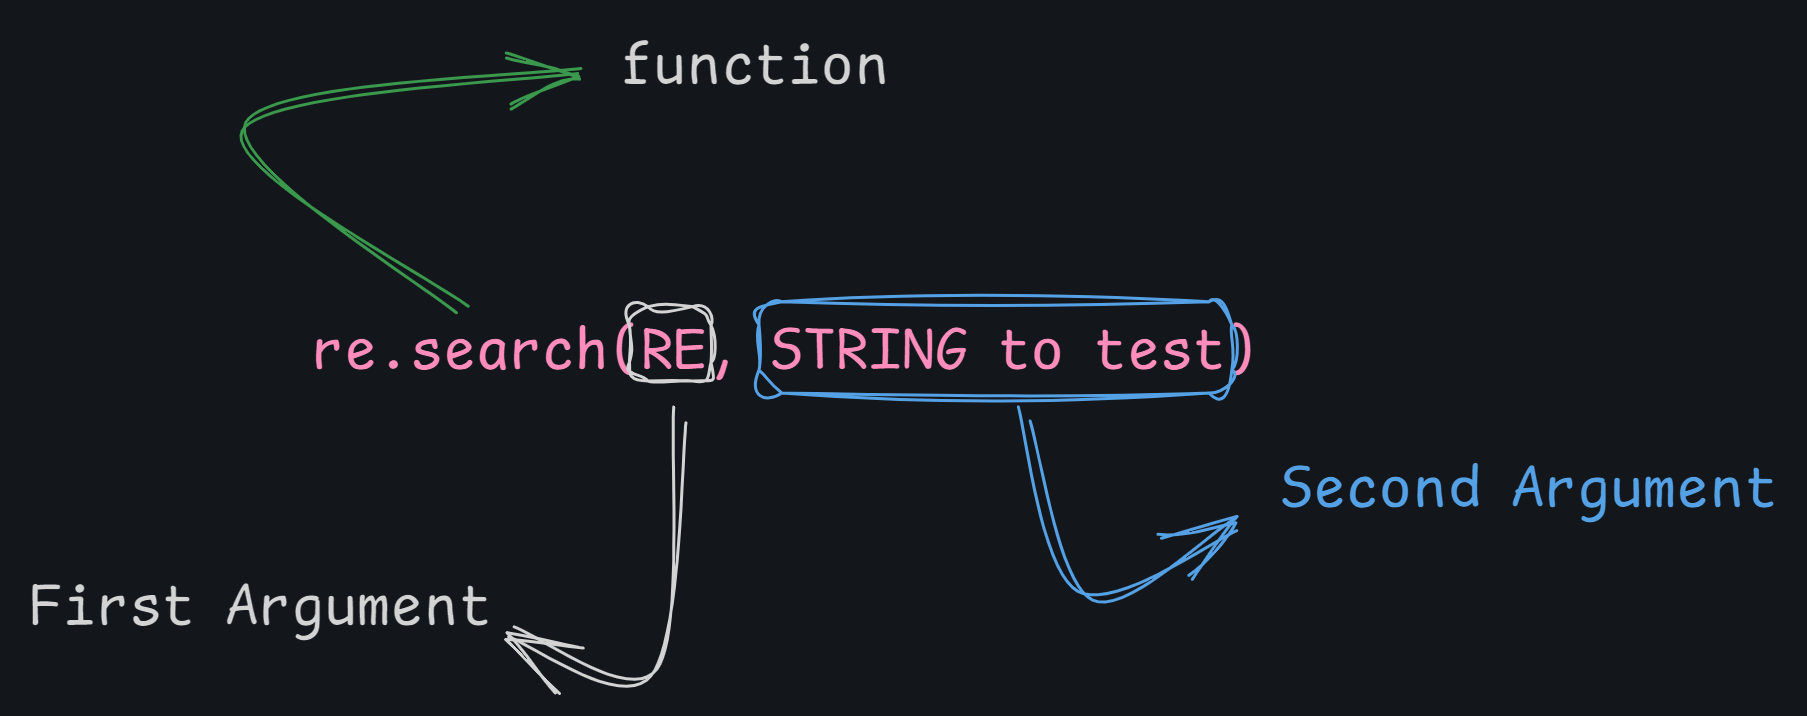

In [ ]:
sentence = 'Hello World! I am starting to learn Regular Expressions!'

# Use RAW STRINGS to construct the RE - considered a GOOD PRACTICE
if re.search(r'Reg', sentence):
  print('Found it!')
  print(f"The type of output is :{type(re.search(r'Reg', sentence))}") # returns a re.Match object

if not re.search(r'reg', sentence):
  print('Not Found it!')
  print(f"The type of output is :{type(re.search(r'reg', sentence))}") # returns a NoneType object

Found it!
The type of output is :<class 're.Match'>
Not Found it!
The type of output is :<class 'NoneType'>


## Compiling RE

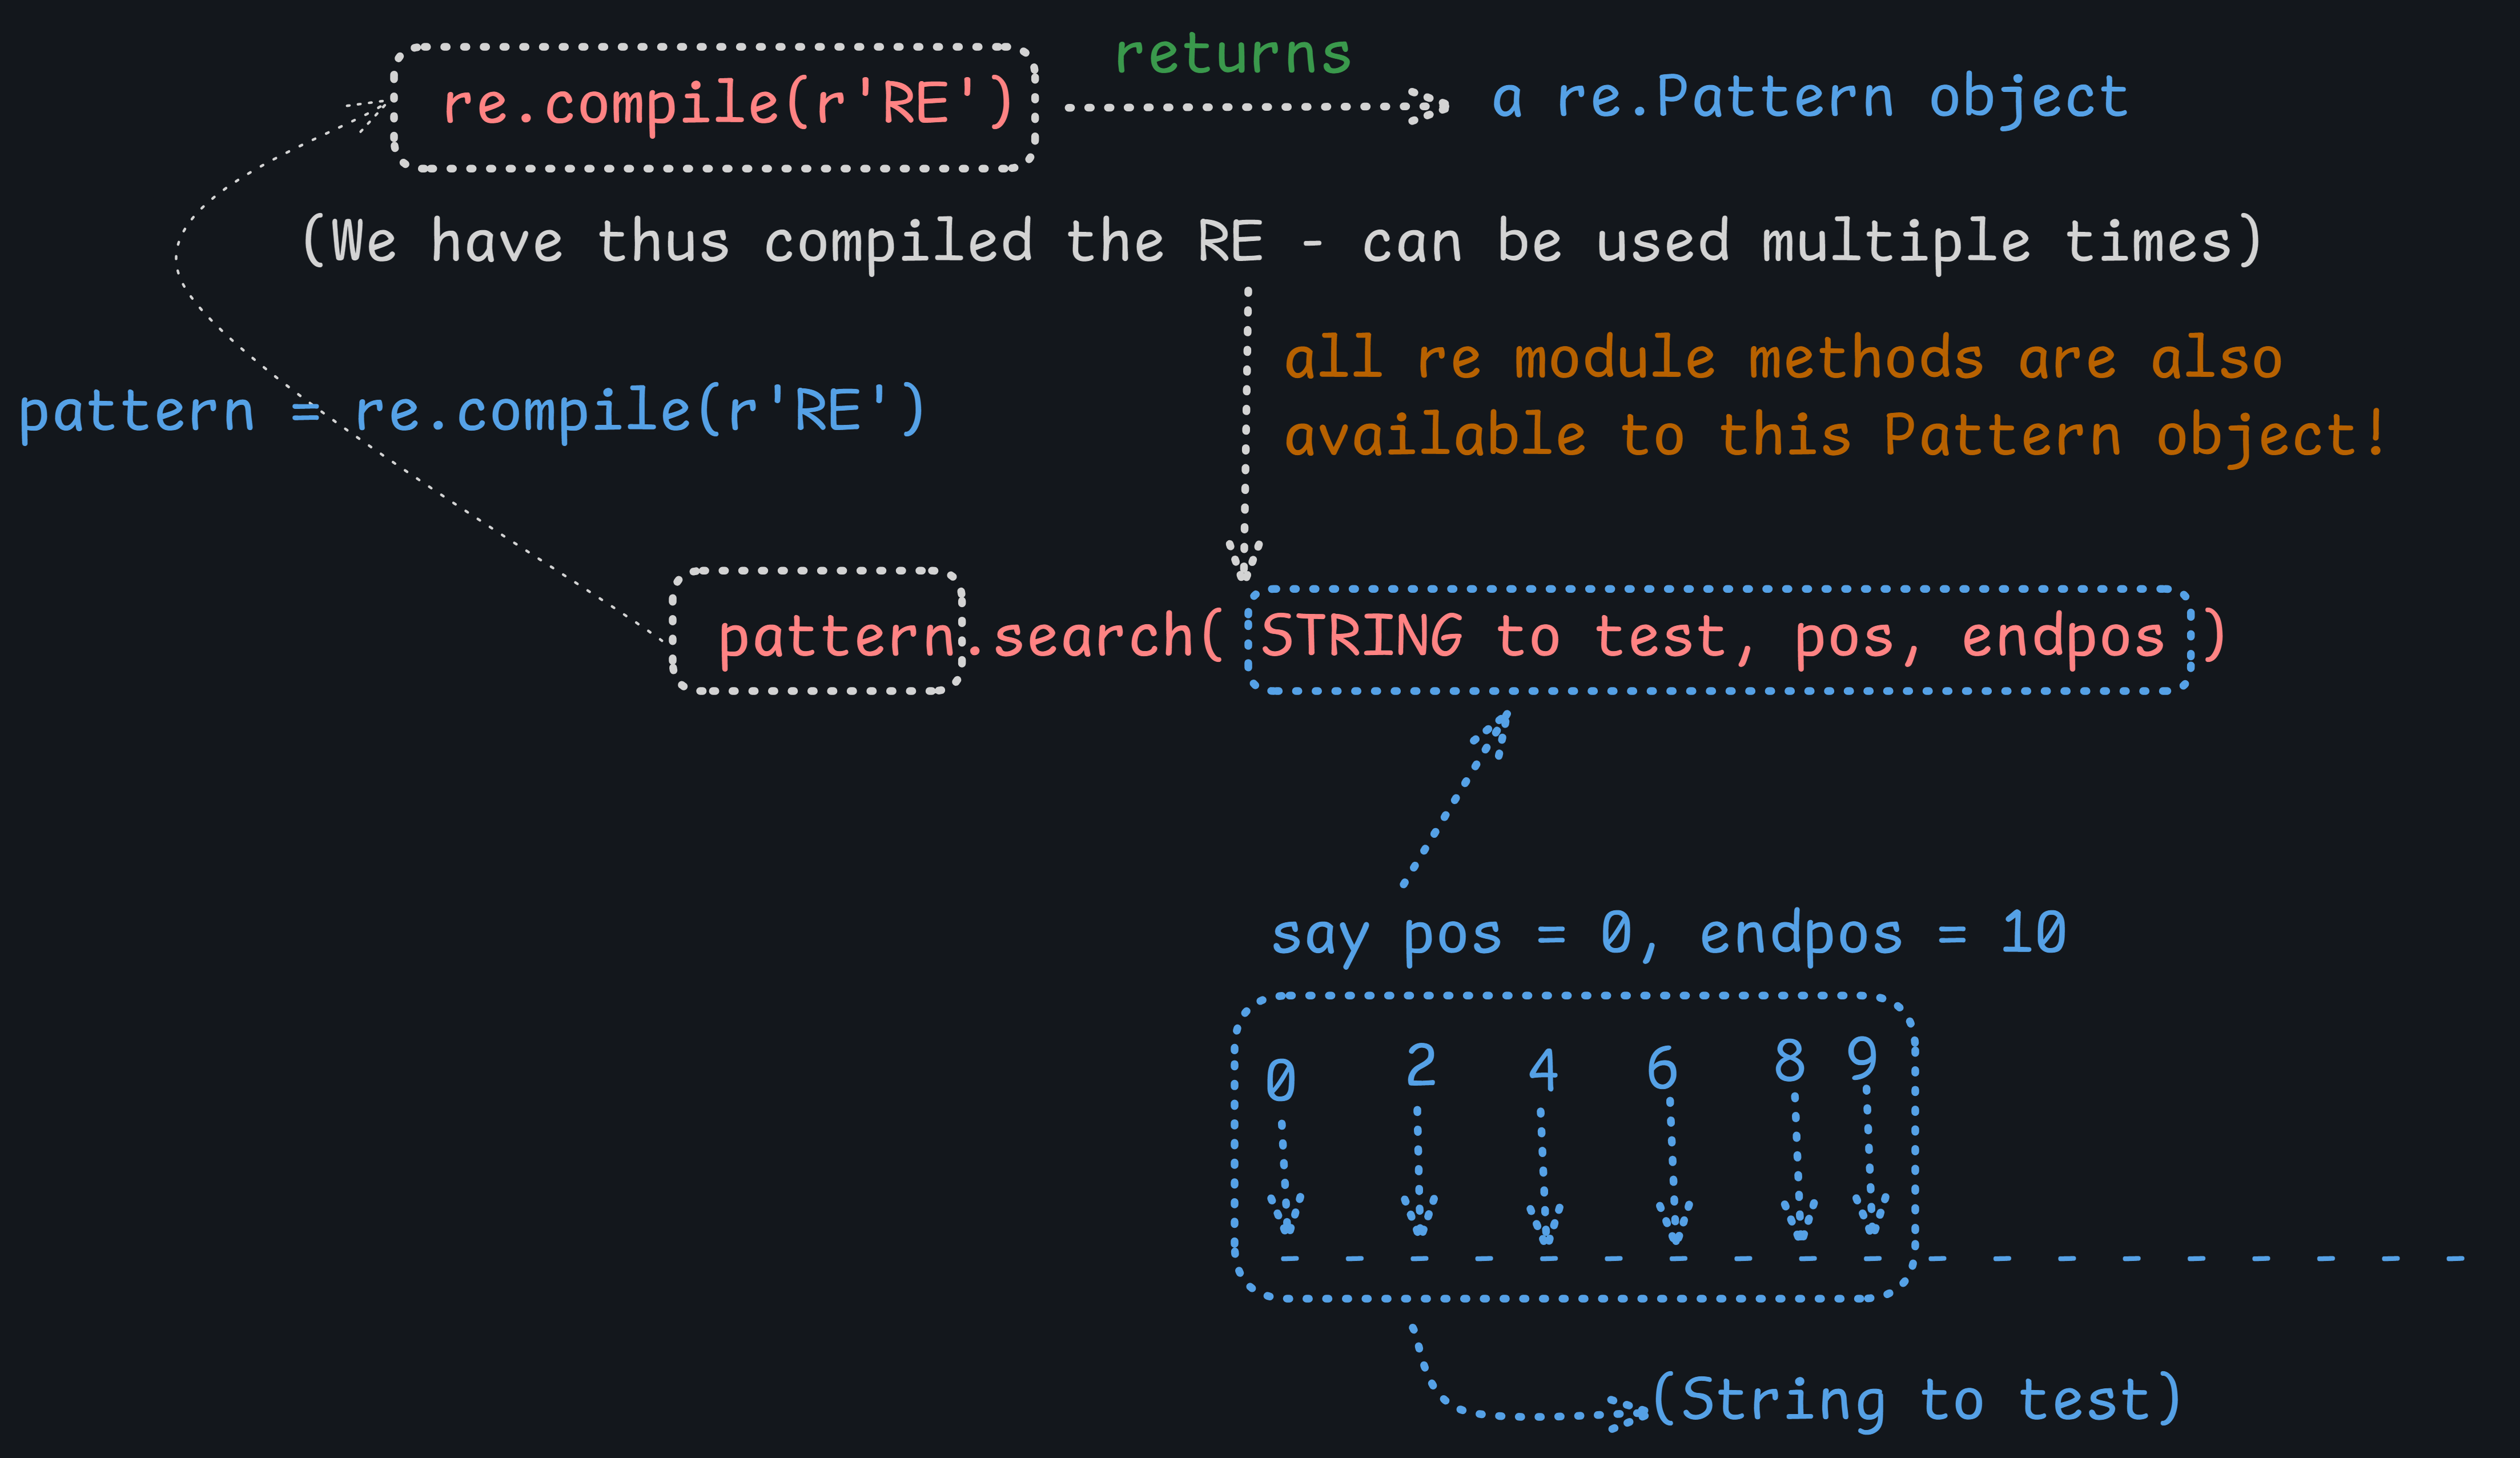



In [ ]:
# Let us now compile the regular expression in the above example
sentence = 'Hello World! I am starting to learn Regular Expressions!'

pattern = re.compile(r'Reg')
print(f"The type of pattern is : {type(pattern)}") # pattern is a re.Pattern object

if pattern.search(sentence):
  print('Found it!')
  print(f"The type of output is :{type(pattern.search(sentence))}")

if not pattern.search(sentence, pos=0, endpos=10): # search in between the first letter and 10th
  print('Not Found it!')
  print(f"The type of output is :{type(pattern.search(sentence, pos=0, endpos=10))}")

The type of pattern is : <class 're.Pattern'>
Found it!
The type of output is :<class 're.Match'>
Not Found it!
The type of output is :<class 'NoneType'>


## regex module
This is a third party module and is backward-compatible with the re module in Python!!

In [ ]:
# the Regex module
import regex

sentence = 'Hello World! I am starting to learn Regular Expressions!'

if regex.search(r'Reg', sentence):
  print('Found it!')
  print(f"The type of output is :{type(regex.search('Reg', sentence))}") #returns a regex.Match object

if not regex.search(r'reg', sentence):
  print('Not Found it!')
  print(f"The type of output is :{type(regex.search(r'reg', sentence))}") # returns a NoneType object

Found it!
The type of output is :<class '_regex.Match'>
Not Found it!
The type of output is :<class 'NoneType'>


## Boundary Matchers


In regex (regular expressions), boundary matchers are special sequences used to **match positions in the text rather than actual characters.** They help define the boundaries where a pattern should start or end.We define here two major types namely the **String Anchors** (\A and \Z) and the **Line Anchors**(^ and $)
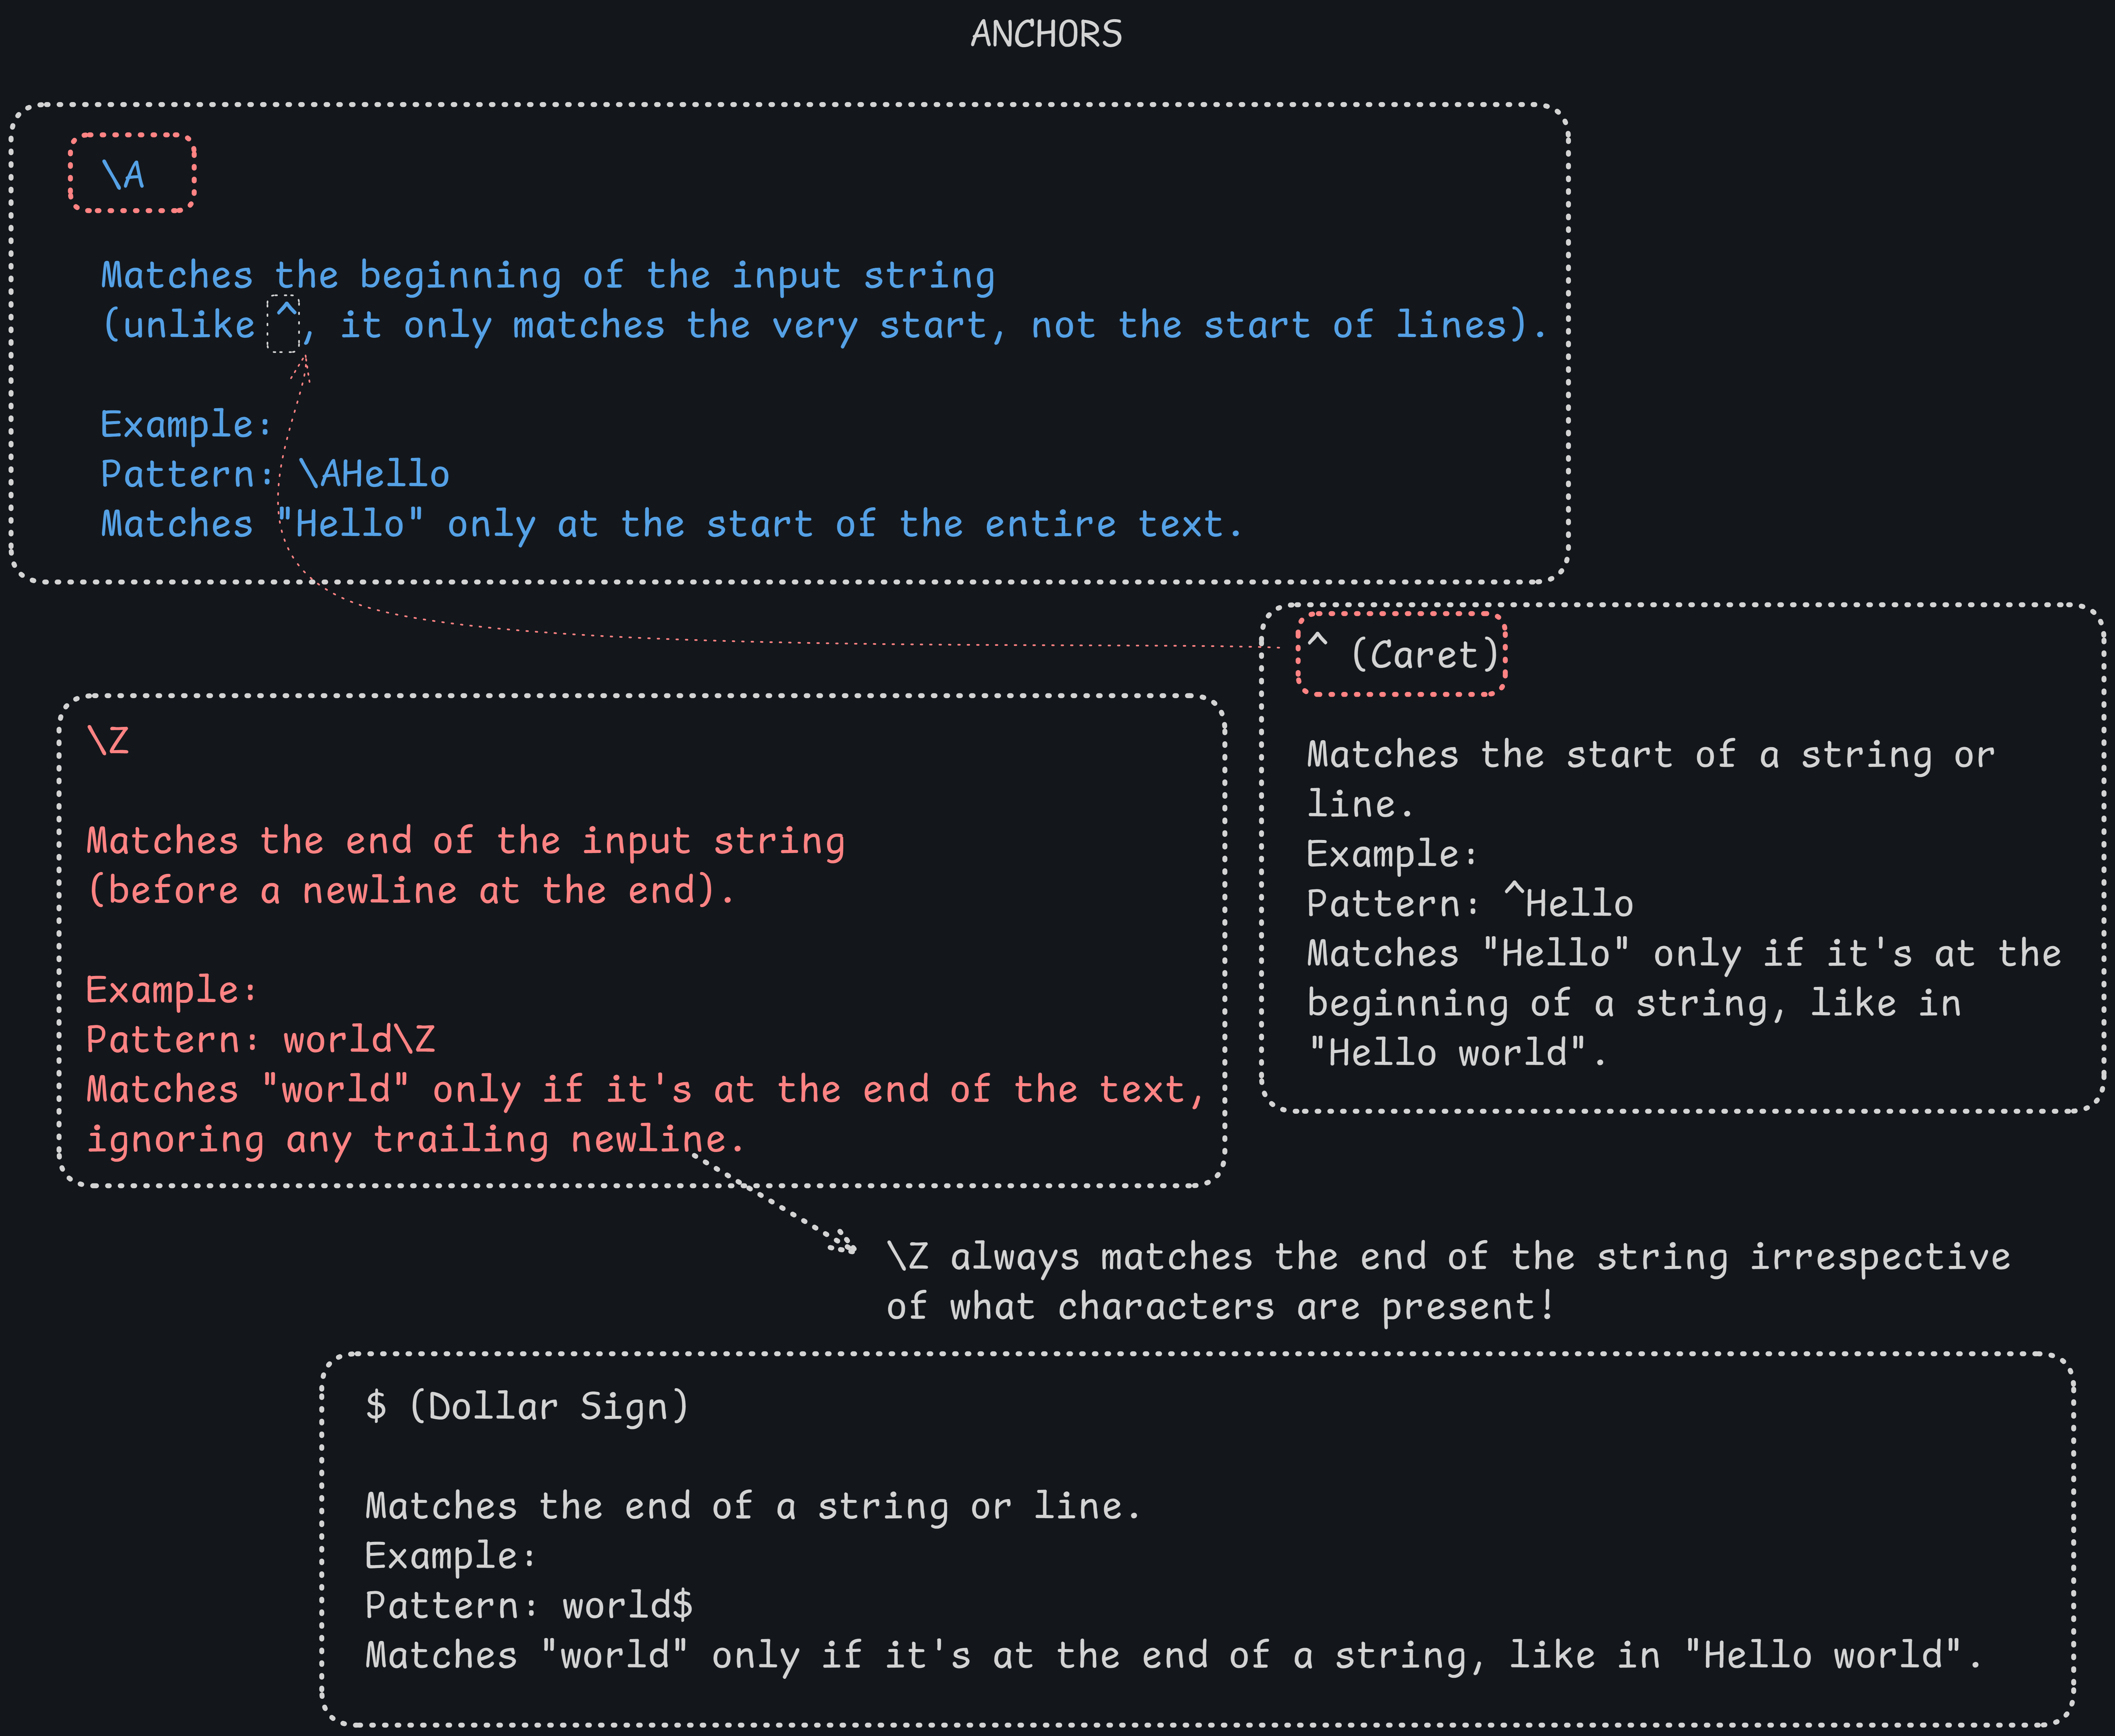



In [ ]:
# Boundary Matchers - \A, \Z

sentence = 'Hey! How are you?\nLong time since we last met'

pattern_1 = re.compile(r'\AHey')
pattern_2 = re.compile(r'met\Z')

if pattern_1.search(sentence):
  print('Pattern found at the beginning!')

if pattern_2.search(sentence):
  print('Pattern found at the end!')

Pattern found at the beginning!
Pattern found at the end!


In [ ]:
sentence = 'Hey! How are you?\nLong time since we last met\n'

pattern_1 = re.compile(r'\Aey')
pattern_2 = re.compile(r'met\Z')

# Note that specifying a start index in search methoid s not equivalent to string slicing
# When we slice a string, it creates a completely new string with its own anchor positions!
if pattern_1.search(sentence, 1):
  print('Pattern found at the beginning!')
else:
  print('The search space is narrowed but the anchor is not changed - REMEMBER!')

# use string slicing instead and the pattern will be found
if pattern_1.search(sentence[1:]):
  print('Pattern found at the beginning!')
else:
  print('The search space is narrowed but the anchor is not changed - REMEMBER!')

if pattern_2.search(sentence):
  print('Pattern found at the end!')
else:
  print('NOTE: \Z always matches the end of the string irrespective of what characters are present! ')

The search space is narrowed but the anchor is not changed - REMEMBER!
Pattern found at the beginning!
NOTE: \Z always matches the end of the string irrespective of what characters are present! 


In [ ]:
# combine \A and \Z to compare a whole string

pattern = re.compile(r'\ABeautiful\Z')
word = "Beautiful"

print(pattern.search(word))
print(bool(pattern.search(word)))

<re.Match object; span=(0, 9), match='Beautiful'>
True


## re.sub

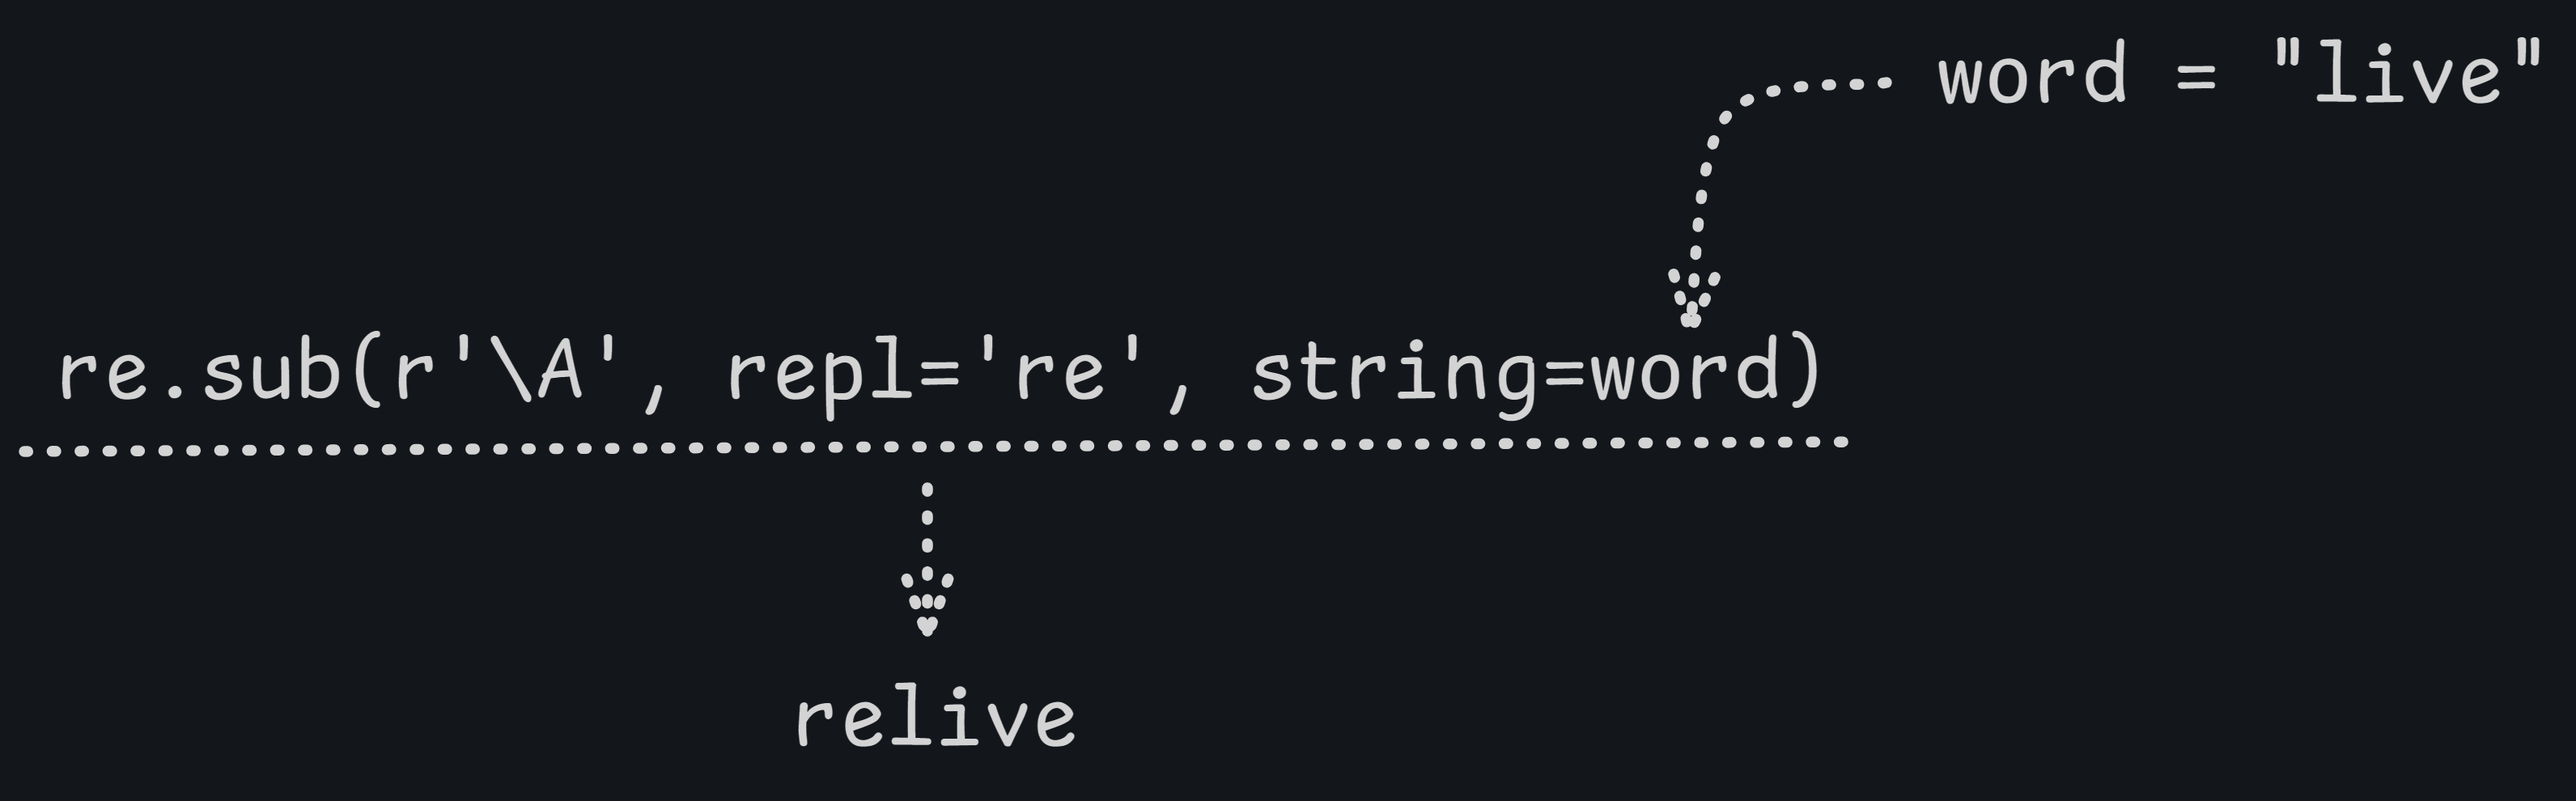


In [ ]:
# re.sub method

word = 'live'

# NOTE: Strings in Python are immutable!
word = re.sub(r'\A', repl='re', string=word)
print(word)

word = re.sub(r'\Are', repl='', string=word)
print(word)

relive
live


In [ ]:
# Boundary Matchers: ^,$
# For $, the string is considered as a single string even when \n is present
sentence = 'Hey! How are you?\nLong time since we last met\n'

pattern_1 = re.compile(r'^Hey')
pattern_2 = re.compile(r'^Long')
pattern_3 = re.compile(r'met$')
pattern_4 = re.compile(r'you?$')

if pattern_1.search(sentence):
  print('Pattern found at the beginning!')

if pattern_2.search(sentence):
  print('Pattern found at the end!')
else:
  print('By deafult the string is considered a single line string - hence does not recognize!')

if pattern_3.search(sentence):
  print('Pattern found at the end!')

if pattern_4.search(sentence):
  print('Pattern found at the end!')
else:
  print('By deafult the string is considered a single line string - hence does not recognize!')

Pattern found at the beginning!
By deafult the string is considered a single line string - hence does not recognize!
Pattern found at the end!
By deafult the string is considered a single line string - hence does not recognize!


In [ ]:
# to make it understand newline - use flag re.M

sentence = 'Hey! Good to see you!\nLong time since we last met\nThanks\n'
# note: I have substituted the ? with ! - there's a reason for that!

pattern_1 = re.compile(r'^Long', flags=re.M)
pattern_2 = re.compile(r'you!$', flags=re.M)
pattern_3 = re.compile(r'^Thanks$', flags=re.M)

if pattern_1.search(sentence):
  print('Pattern found at the beginning of a sentence!')

if pattern_2.search(sentence):
  print('Pattern found at the end of a sentence!')

if pattern_3.search(sentence):
  print('This is a single word sentence')

Pattern found at the beginning of a sentence!
Pattern found at the end of a sentence!
This is a single word sentence


In [ ]:
# Just like string anchors, you can use the line anchors by themselves as a pattern
# note that there is no \n at the end of this input string
ip_lines = 'Camel is found in desert\nGiraffe is the tallest animal\nTiger is a lone warrior'
print(re.sub(r'^', r'* ', ip_lines, flags=re.M))
print(re.sub(r'$', r'.', ip_lines, flags=re.M))

* Camel is found in desert
* Giraffe is the tallest animal
* Tiger is a lone warrior
Camel is found in desert.
Giraffe is the tallest animal.
Tiger is a lone warrior.


## Boundary Matchers contd...
### Word Matchers
The escape sequence **\b** denotes a **word boundary**. This **works for both start of word and end of word anchoring.**

*Start of word means either the character prior to the word is a non-word character or there is no character (start of string).*

Similarly, *end of word means the character after the word is a non-word character or no character (end of string).* This implies that you
cannot have word boundary \b without a word character.

In [ ]:
#consider the following sentence ( don't try to find meaning! )
sentence = 'tse-tse fly can see at sea and fly at ease-se'

print(re.sub(r'se', r'S', sentence))
print(re.sub(r'\bse', r'S', sentence))
print(re.sub(r'se\b', r'S', sentence))
print(re.sub(r'\bse\b', r'S', sentence))

tS-tS fly can Se at Sa and fly at eaS-S
tse-tse fly can Se at Sa and fly at ease-S
tS-tS fly can see at sea and fly at eaS-S
tse-tse fly can see at sea and fly at ease-S


In [ ]:
# another usage of \b with replace

words = 'apple banana orange watermelon guava'
print(re.sub(r'\b', r'"', words).replace(' ', ','))

"apple","banana","orange","watermelon","guava"


**\B (Non-Word Boundary)**

Matches a position that is not at a word boundary.

Example:

Pattern: \Bcat\B
Matches "cat" in "caterpillar", but not "cat" as a standalone word.

In [ ]:
words = 'part spare-parts apparent spare spar'

# replace 'par' if it is not start of word
print(re.sub(r'\Bpar', r'X', words))

# replace 'par' at end of word but not whole word 'par'
print(re.sub(r'\Bpar\b', r'X', words))

# replace 'par' if it is not end of word
print(re.sub(r'par\B', r'X', words))

# replace 'par' if it is surrounded by word characters
print(re.sub(r'\Bpar\B', r'X', words))

part sXe-parts apXent sXe sX
part spare-parts apparent spare sX
Xt sXe-Xts apXent sXe spar
part sXe-parts apXent sXe spar


In [ ]:
print(re.sub(r'\b', r':', 'copper'))
print(re.sub(r'\B', r':', 'copper'))

print(re.sub(r'\b', r' ', '-----hello-----'))
print(re.sub(r'\B', r' ', '-----hello-----'))

:copper:
c:o:p:p:e:r
----- hello -----
 - - - - -h e l l o- - - - - 


# Alternation
Now, we are going to see how to match against a set of regular expressions. This is accomplished using the pipe symbol |.

In regular expressions, the pipe symbol (|) is used to specify an alternation, which allows you to match one of several different patterns. The pipe symbol separates the different patterns, and the regular expression engine will try to match each one in order. The first pattern that matches will be used.

Syntax
```python
pattern1|pattern2|pattern3
```

In [ ]:
# Test strings
test_strings = {
    "basic": "I have a cat and a dog.",
    "group": "I saw a bear and a bull in the zoo.",
    "character_class": "The sky is gray or grey.",
    "word_boundary": "I love my cat but not catalog or doghouse."
}

# Examples of different types of alternation
# Note: re.findall method returns all the matched portions as a list!

# 1. Basic Alternation: cat or dog
words = ['cat', 'dog']
# basic_pattern = r"cat|dog"
basic_pattern = '|'.join(words)
basic_matches = re.findall(basic_pattern, test_strings['basic'])
print(f'basic:{basic_matches}')

basic_sub_pattern = r"\Acat|cats\b"
sub_string ='cats are enjoying since it is raining cats and dogs'
sub_string = re.sub(basic_sub_pattern, 'dog', sub_string)
print(sub_string)

# 2. Alternation with Groups: bear or bull
group_pattern = r"b(ear|ull)"
group_matches = re.findall(group_pattern, test_strings['group'])
print(f'group:{group_matches}') # NOTE: this returns ['ear','ull'] - NOT - ['bear','bull']

test_strings['group'] = re.sub(group_pattern, r'X', test_strings['group'])
print(test_strings['group'])

# 3. Alternation with Characters: gray or grey
char_class_pattern = r"gr[ae]y"
char_class_matches = re.findall(char_class_pattern, test_strings['character_class'])
print(f'character-class:{char_class_matches}')

# 4. Alternation with Word Boundaries: match cat or dog but not catalog or doghouse
word_boundary_pattern = r"\bcat\b|\bdog"
word_boundary_matches = re.findall(word_boundary_pattern, test_strings['word_boundary'])
print(f'boundary-matchers:{word_boundary_matches}')

test_strings['word_boundary'] = re.sub(word_boundary_pattern, r'X', test_strings['word_boundary'])
print(test_strings['word_boundary'])

basic:['cat', 'dog']
dogs are enjoying since it is raining dog and dogs
group:['ear', 'ull']
I saw a X and a X in the zoo.
character-class:['gray', 'grey']
boundary-matchers:['cat', 'dog']
I love my X but not catalog or Xhouse.


In [ ]:
# note how raw string is used on either side of concatenation
# avoid f-strings unless you know how to compensate for RE
words = ['cat|par']
alt = re.compile(r'\b(' + '|'.join(words) + r')\b')
# only whole words will be replaced now
print(alt.sub(r'X', 'cater cat concatenate par spare'))

# this is how the above RE looks as a normal string
print(alt.pattern) # \b(cat|par)\b

print(alt.pattern == r'\b(cat|par)\b') # True

cater X concatenate X spare
\b(cat|par)\b
True


## Precedence Rules

In Python, the **alternation operator (|)** matches the **first alternative that works**, meaning the leftmost pattern that matches earliest in the input string gets precedence. This can lead to tricky situations when one alternative is a substring of another, like "are" and "spared".

Here’s how precedence plays out with examples:

**Earliest Match Precedence:** When alternation is used in Python, the first match found, going left to right, is returned. This holds for both matching and replacement tasks.

If both are and spared are tested, are (the shorter substring) will match first if it appears earlier.

In [ ]:
# Test strings
test_string = "We are spared from the worst."

# span shows the start and end+1 index of matched portion
# match shows the text that satisfied the search criteria
print(re.search(r'fro', test_string))
print(re.search(r'wor', test_string))

# starting index of 'fro' < index of 'wor' for given string input
# so 'fro' will be replaced irrespective of order
# count optional argument here restricts no. of replacements to 1
print(re.sub(r'fro|wor', r'X', test_string, count=1))
print(re.sub(r'wor|fro', r'X', test_string, count=1))

<re.Match object; span=(14, 17), match='fro'>
<re.Match object; span=(23, 26), match='wor'>
We are spared Xm the worst.
We are spared Xm the worst.


In [ ]:
# Test strings
test_string = "We are spared from the worst."

# span shows the start and end+1 index of matched portion
# match shows the text that satisfied the search criteria
print(re.search(r'spa', test_string))
print(re.search(r'spare', test_string))

# starting index of 'spa' = index of 'spare' for given string input
# so, which one gets replaced depends on the order of alternation
print(re.sub(r'spa|spare', r'X', test_string))
print(re.sub(r'spare|spa', r'X', test_string))

<re.Match object; span=(7, 10), match='spa'>
<re.Match object; span=(7, 12), match='spare'>
We are Xred from the worst.
We are Xd from the worst.


If you do not want substrings to sabotage your replacements, a robust workaround is to sort
the alternations based on length, longest first.

In [ ]:
words = ['are', 'spare', 'ar', 'a']
pattern = re.compile('|'.join(sorted(words, key=len, reverse=True)))
pattern.pattern

'spare|are|ar|a'

In [ ]:
test_string = "We are spared from the worst."

print(re.sub(pattern, r'X', test_string))

We X Xd from the worst.


In regular expressions, certain characters (like . or *) have special meanings, known as metacharacters. To match them literally in a string (i.e., as the actual characters themselves), you need to "escape" them using a backslash (\). Let’s explore this with examples, including the usage of re.escape().

### 1. Escaping Metacharacters with \
When you want to match a metacharacter literally, you need to escape it with a backslash (\). For example, the dot (.) is normally a metacharacter that matches any character. To match a literal dot, you need to escape it.

In [ ]:
# Without escaping: '.' matches any character
pattern = r"."
test_string = "abc"
matches = re.findall(pattern, test_string)
print("Matches any character:", matches)  # Output: ['a', 'b', 'c']

# Escaping the dot: '\.' matches a literal dot
pattern = r"\."
test_string = "a.b"
matches = re.findall(pattern, test_string)
print("Matches literal dot:", matches)  # Output: ['.']

Matches any character: ['a', 'b', 'c']
Matches literal dot: ['.']


### 2. Escaping Backslashes (\\)
Since the backslash itself is a metacharacter, to match a literal backslash (\), you need to escape it by using double backslashes (\\). This is necessary because Python uses backslashes for special sequences (like \n for newlines), so the first backslash is for Python and the second is for the regex engine.

In [ ]:
# Pattern to match a literal backslash
print(re.sub(r'\\', r'/', r'\learn\by\example'))
print(re.findall(r'\\', r'\learn\by\example')) # note the test string is also raw string here!

/learn/by/example
['\\', '\\', '\\']


In [ ]:
# Pattern to match a literal backslash
pattern = r"\\"
test_string = "a\b"
matches = re.findall(pattern, test_string)
print("Matches literal backslash when test string is not raw form:", matches)  # Output: ['\\']

# Pattern to match a literal backslash
pattern = r"\\"
test_string = r"a\b"
matches = re.findall(pattern, test_string)
print("Matches literal backslash when test string is of raw form:", matches)  # Output: ['\\']

Matches literal backslash when test string is not raw form: []
Matches literal backslash when test string is of raw form: ['\\']


### 3. re.escape()
The re.escape() function is useful when you want to match a string exactly as it is, without worrying about manually escaping metacharacters. It automatically escapes all special characters in a string by placing backslashes before them, making it safe to use in regex.

In [ ]:
# String with metacharacters
test_string = "a.b*+?|^$"

# Using re.escape() to escape all metacharacters
escaped_string = re.escape(test_string)
print("Escaped string:", escaped_string)  # Output: 'a\.b\*\+\?\|\^\$'

# Now the escaped string can be used safely in regex to match exactly 'a.b*+?|^$'
pattern = re.compile(escaped_string)
matches = pattern.findall("a.b*+?|^$")
print("Matches literal string:", matches)  # Output: ['a.b*+?|^$']

Escaped string: a\.b\*\+\?\|\^\$
Matches literal string: ['a.b*+?|^$']


## Dot Metacharacter and Quantifiers

Regular Expression (Regex) Quantifiers and Operators in Detail
In regular expressions, quantifiers specify how many instances of a character, group, or character class must be present in the input for a match to occur. Let's explain each concept you listed in detail:

### 1. . (Dot Metacharacter)
Matches any character except the newline character (\n).
Greedy by nature, meaning it will try to match as much as possible.
Example:

In [ ]:
pattern = r"a.b" # Here, . matches any character between a and b.
test_string = "a_b a!b axb"
matches = re.findall(pattern, test_string)
print(matches)  # Output: ['a_b', 'a!b', 'axb']

['a_b', 'a!b', 'axb']


### 2. Greedy Quantifiers
Quantifiers that match as many characters as possible are called greedy. The most common greedy quantifiers are:

?: Matches 0 or 1 occurrence of the preceding element.

Example:

In [ ]:
pattern = r"colou?r"
test_string = "color colour"
matches = re.findall(pattern, test_string)
print(matches)  # Output: ['color', 'colour']

['color', 'colour']


*: Matches 0 or more occurrences of the preceding element.

In [ ]:
pattern = r"ba*"
test_string = "b ba baa baaa"
matches = re.findall(pattern, test_string)
print(matches)  # Output: ['b', 'ba', 'baa', 'baaa']

['b', 'ba', 'baa', 'baaa']


+: Matches 1 or more occurrences of the preceding element.

In [ ]:
pattern = r"ba+"
test_string = "b ba baa baaa"
matches = re.findall(pattern, test_string)
print(matches)  # Output: ['ba', 'baa', 'baaa']

['ba', 'baa', 'baaa']


$\{m,n\}$: Matches at least m and at most n occurrences of the preceding element.

Example:

In [ ]:
pattern = r"a{1,3}"
test_string = "a aa aaa aaaa"
matches = re.findall(pattern, test_string)
print(matches)

['a', 'aa', 'aaa', 'aaa', 'a']


#### Explanation:
The pattern $a\{1,3\}$ is designed to match between 1 and 3 occurrences of the letter $'a'$.

`re.findall()` finds **all non-overlapping matches of the pattern in the input string.** However, if a match of 3 characters ('aaa') is found, it doesn't prevent another match from starting just after the first character of that match. This means overlapping sections of the string can still be matched.

Let’s break it down for the string "a aa aaa aaaa":

- First match: a (the first 'a')

- Second match: aa (the two 'a's after the first space)

- Third match: aaa (the three 'a's after the second space)

- Fourth match: aaa (the first three 'a's in the final "aaaa")

Note: The regex engine leaves one 'a' out (the fourth one), allowing it to be used in the next match.

Fifth match: a (the last 'a' from "aaaa")

This results in the output: ['a', 'aa', 'aaa', 'aaa', 'a'].

Solution - (If you want non-overlapping matches):
To prevent overlapping behavior, you could use the anchor \b (word boundary) to ensure that each 'a' group is treated as separate words, depending on your exact requirement.

Example:

In [ ]:
import re
pattern = r"\ba{1,3}\b"
test_string = "a aa aaa aaaa"
matches = re.findall(pattern, test_string)
print(matches)  # Output: ['a', 'aa', 'aaa']

['a', 'aa', 'aaa']


$\{m,\}$: Matches at least m occurrences (no upper limit).

In [ ]:
pattern = r"a{2,}"
test_string = "a aa aaa aaaa"
matches = re.findall(pattern, test_string)
print(matches)  # Output: ['aa', 'aaa', 'aaaa']

['aa', 'aaa', 'aaaa', 'aaaaaaa']


In the pattern r"a{2,}", the regex is designed to match 2 or more occurrences of the letter 'a'. Since this is a greedy match (by default), it will match the longest possible sequence of consecutive 'a's. Once the pattern has matched a sequence of at least 2 'a's, it moves forward without overlapping with the previous match

#### Non-overlapping behavior:
The reason there's no overlap in this case is that **after matching the 'aa', 'aaa', and 'aaaa' sequences, the regex engine consumes the entire matching portion of the string and moves forward, so there’s no possibility for overlap.**In contrast to the pattern a{1,3}, where different matches can start within a previously matched group (because a{1,3} could match shorter subsequences), a{2,} requires at least 2 characters, so once it matches a long sequence, it moves to the next.

$\{,n\}$: Matches up to n occurrences, including 0 occurrences.

In [ ]:
pattern = r"a{,2}"
test_string = "a aa aaa"
matches = re.findall(pattern, test_string)
print(matches)  # Output: ['a', 'aa', 'aa']

['a', '', 'aa', '', 'aa', 'a', '']


In [ ]:
pattern = r"a{,2}"
test_string = "a aa aaa"
sub_text = re.sub(pattern, r'X', test_string)
print(sub_text)

XX XX XXX


#### Explanation:
Pattern $a\{,2\}$:

This pattern is looking for 0 to 2 occurrences of the letter $'a'$. The $\{,2\}$ is equivalent to $\{0,2\}$, meaning it matches from 0 up to 2 'a's.
It can match:
0 occurrences (empty string)
1 occurrence ('a')
2 occurrences ('aa')

Behavior of re.findall():

`re.findall()` will ***try to find all possible non-overlapping matches, including empty matches (because the pattern can match 0 occurrences).***
When it doesn't find an 'a', it still matches 0 occurrences, which leads to empty strings ('') in the result.
Breakdown of the string "a aa aaa":
- First match: 'a' (1 occurrence of 'a')
>After matching the first 'a', the engine looks at the position after the 'a' and tries to match again. Since it's between the first 'a' and the space, it can match 0 occurrences, resulting in an empty string ('').

- Second match: '' (0 occurrences of 'a' after the first space).

- Third match: 'aa' (2 occurrences of 'a').
>After 'aa', it again tries to match between the 'aa' and the space, matching 0 occurrences ('').

- Fourth match: 'aa' (2 occurrences of 'a' from the start of 'aaa').
>After 'aa', it tries to match at the position after the second 'a' in 'aaa', and finds 1 occurrence of 'a'.

- Fifth match: 'a' (1 occurrence of 'a' after the first two 'a's in 'aaa').

- Sixth match: '' (0 occurrences after the last 'a').

#### Summary of the process:
The regex engine tries to find matches everywhere in the string. Since your pattern a{,2} allows 0 matches, it also includes empty matches wherever there are gaps (like after spaces and at the end of the string).

$\{n\}$: Matches exactly n occurrences.

In [ ]:
pattern = r"a{3}"
test_string = "a aa aaa aaaa"
matches = re.findall(pattern, test_string)
print(matches)  # Output: ['aaa']

['aaa', 'aaa']


### 3. Pattern with Greedy Matching (pat1.*pat2)
This pattern matches pat1, followed by any number of characters, and then pat2. Since .* is greedy, it will match as many characters as possible between pat1 and pat2.

Example:

In [ ]:
pattern = r"start.*end"
test_string = "start middle end"
matches = re.findall(pattern, test_string)
print(matches)  # Output: ['start middle end']

['start middle end']


### 4. Alternation (pat1.*pat2|pat2.*pat1)
This pattern matches either pat1 followed by any characters and then pat2, or the reverse (pat2 followed by any characters and then pat1).

Example:

In [ ]:
pattern = r"cat.*dog|dog.*cat"
test_string = "I have a cat and a dog & a dog and a cat."
matches = re.findall(pattern, test_string)
print(matches)  # Output: ['cat and a dog & a dog'] - Greedy matching

['cat and a dog & a dog']


### 5. Non-Greedy Quantifiers (Append ? to make them non-greedy)
By appending ? to a greedy quantifier, you make it non-greedy, meaning it will match as few characters as possible.

Example:

In [ ]:
pattern = r"cat.*?dog|dog.*cat"
test_string = "I have a cat and a dog & a dog and a cat."
matches = re.findall(pattern, test_string)
print(matches)

['cat and a dog', 'dog and a cat']


In [ ]:
pattern = r"start.*?end"
test_string = "start middle end end"
matches = re.findall(pattern, test_string)
print(matches)  # Output: ['start middle end']
#Here, .*? will match the shortest string between start and end.

['start middle end']


### 6. Possessive Quantifiers (*+, ++, ?+, etc.) (Requires regex module)
Possessive quantifiers, like greedy ones, match as many characters as possible, but do not backtrack to attempt other matches. This is different from greedy quantifiers, which may backtrack if necessary.

- Greedy: Tries to match as much as possible, but backtracks if needed.
- Possessive: Tries to match as much as possible and does not backtrack.

Example (requires regex module):

In [ ]:
pattern = r"ab.*b"
test_string = "abddbcefrrt"
matches = re.search(pattern, test_string)
print(matches)

<re.Match object; span=(0, 5), match='abddb'>


The regular expression engine actually does consume all
the characters after `ab`. Then realizing that the RE fails, it gives back one character from end of string
and checks again if RE is satisfied. This process is repeated until a match is found or failure
is confirmed. In regular expression parlance, this is called **backtracking**.

In [ ]:
sentence = 'that is quite a fabricated tale'
# r't.*a' will always match from first 't' to last 'a'
# also, note that count argument is set to 1 for illustration purposes
print(re.sub(r't.*a', r'X', sentence, count=1)) # 'Xle'
print(re.sub(r't.*a', r'X', 'star', count=1)) # 'sXr'

# matching first 't' to last 'a' for t.*a won't work for these cases
# the engine backtracks until .*q matches and so on
print(re.sub(r't.*a.*q.*f', r'X', sentence, count=1)) # 'Xabricated tale'
print(re.sub(r't.*a.*u', r'X', sentence, count=1)) # 'Xite a fabricated tale'

Xle
sXr
Xabricated tale
Xite a fabricated tale


In [ ]:
import regex

pattern = r"ab.*+b"
test_string = "abddbcefrrt"
matches = regex.search(pattern, test_string)
print(matches)

None


In [ ]:
regex.sub(r'f(a|e)*at', r'X', 'feat ft feaeat')

'X ft X'

In [ ]:
# (a|e)*+ would match 'a' or 'e' as much as possible
# no backtracking, so another 'a' can never match
regex.sub(r'f(a|e)*+at', r'X', 'feat ft feaeat')

'feat ft feaeat'

### 7. Atomic Grouping ((?>pat))
Atomic grouping is like a possessive quantifier: once a match is made inside the atomic group, it does not backtrack to try other alternatives.

Example (requires regex module):

In [ ]:
pattern = r"(?>ab*)b"
test_string = "abbbb"
matches = regex.findall(pattern, test_string)
print(matches)

[]


The pattern you're using, (?>ab*)b, employs atomic grouping and is meant to match specific sequences in the string.

Let's break it down and explain why the output is an empty list [] for the test string "abbbb".

**Breakdown of the Pattern (?>...)**: This syntax denotes an atomic group. It matches whatever is inside the parentheses without allowing for backtracking. If this group matches, it will not reconsider this match when looking for other matches outside this group.

`ab*`:

- a: Matches the character 'a' once.
- b*: Matches zero or more occurrences of the character 'b'. This means it can match an empty string or multiple 'b's.

`b`: Matches the character 'b' exactly.

**How the Pattern Works with the Test String?**

Let's analyze the input string "abbbb" with the pattern (?>ab*)b:

1. The regex engine will look for a match in the string.
2. The atomic group (?>ab*) attempts to match:
>- It matches the 'a' in the string (the first character).
>- Then, it tries to match as many 'b's as possible after the 'a'. In this case, it can match all four 'b's because b* allows for zero or more occurrences of 'b'.
>- So, the group (?>ab*) successfully matches the entire substring 'abbbb'.

3. After the atomic group, the regex looks for another 'b' to satisfy the outer pattern.
>- However, after matching the atomic group, it has consumed the entire string (up to the last 'b'), leaving nothing left for the final b in the pattern to match.

**Why the Output is []?**

- Since the atomic group matched the entire string up to the last 'b' and does not allow for backtracking, the regex engine is unable to find a separate 'b' after the group match.

Thus, there is no match for the entire pattern in the string, and re.findall returns an empty list [].


### 8. re.split(r'pat', s)
This function splits the string s wherever the pattern pat matches. The optional arguments maxsplit and flags can be used to limit the number of splits or modify how the pattern is interpreted.

Example:

In [ ]:
pattern = r"\s+"  # Split by one or more spaces
test_string = "split   by  spaces"
splits = re.split(pattern, test_string)
print(splits)  # Output: ['split', 'by', 'spaces']

['split', 'by', 'spaces']


The `re.split` function in Python allows you to split a string based on a regular expression pattern. You can also control how many splits to perform using the maxsplit argument and modify the matching behavior with the flags argument.


```python
re.split(pattern, string, maxsplit=0, flags=0)
```
- pattern: The regular expression pattern to split the string.
- string: The input string to split.
- maxsplit: (Optional) The maximum number of splits to perform. Default is 0, which means "all occurrences."
- flags: (Optional) Flags to modify the regex behavior (like re.IGNORECASE, re.MULTILINE, etc.).

Example Usage

Let's go through an example demonstrating how to use re.split with both the maxsplit and flags arguments.

In [ ]:
# Sample string
test_string = "apple, banana, Cherry, date, elderberry, Fig"

# Split using a comma and optional whitespace, with a maxsplit of 2
# Use re.IGNORECASE to make the matching case-insensitive
pattern = r'\s*,\s*'  # Pattern to match commas with optional surrounding spaces

# Split the string with maxsplit=2
result = re.split(pattern, test_string, maxsplit=2, flags=re.IGNORECASE)

print(result)

['apple', 'banana', 'Cherry, date, elderberry, Fig']


Explanation of the Example:

```python
Pattern: r'\s*,\s*'
```

This pattern matches a comma (,) surrounded by optional whitespace (\s* means zero or more whitespace characters).

Maxsplit: 2

This means that the split will occur only at the first two occurrences of the matched pattern.

Flags: re.IGNORECASE

This flag makes the regex case-insensitive. However, in this case, it doesn't have any effect because the pattern does not depend on character case. It's included here to show how flags can be used.